#### Types of Unsupervised Learning

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In this part, we'll look into two types of unsupervised learning: clustering and transformation of the data.

- Unsupervised transformations of the data, which are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data.
- Clustering, which are algorithms that partition data into groups such that similar items are in the same group and dissimilar items are in different groups.

#### Challenges of Unsupervised Learning

Unsupervised learning is often harder to understand and evaluate than supervised learning. In supervised learning, we have a clear goal, which is to predict the labels of the data. We can then measure the performance of our model based on its ability to predict the true labels of the data. In unsupervised learning, there is no simple measure of performance. For example, if we are clustering the data into two groups, we can measure how well the clustering algorithm accomplished this, but we have no way of telling if this is the "right" clustering.

As a consequence, unsupervised learning algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as a part of a larger system that automatically makes decisions based on data.

Before we start, we'll briefly discuss some simple preprocessing methods that are often used in unsupervised learning.

#### Preprocessing and Scaling

In the Previous chapter, we discussed the importance of preprocessing and scaling the data before applying a supervised learning algorithm. The same is true for unsupervised learning. In fact, preprocessing and scaling are even more critical in unsupervised learning, because we don't have the output (i.e., the supervised labels) to help us make sense of the data. In this chapter, we'll discuss the most common preprocessing and scaling techniques used in unsupervised learning.

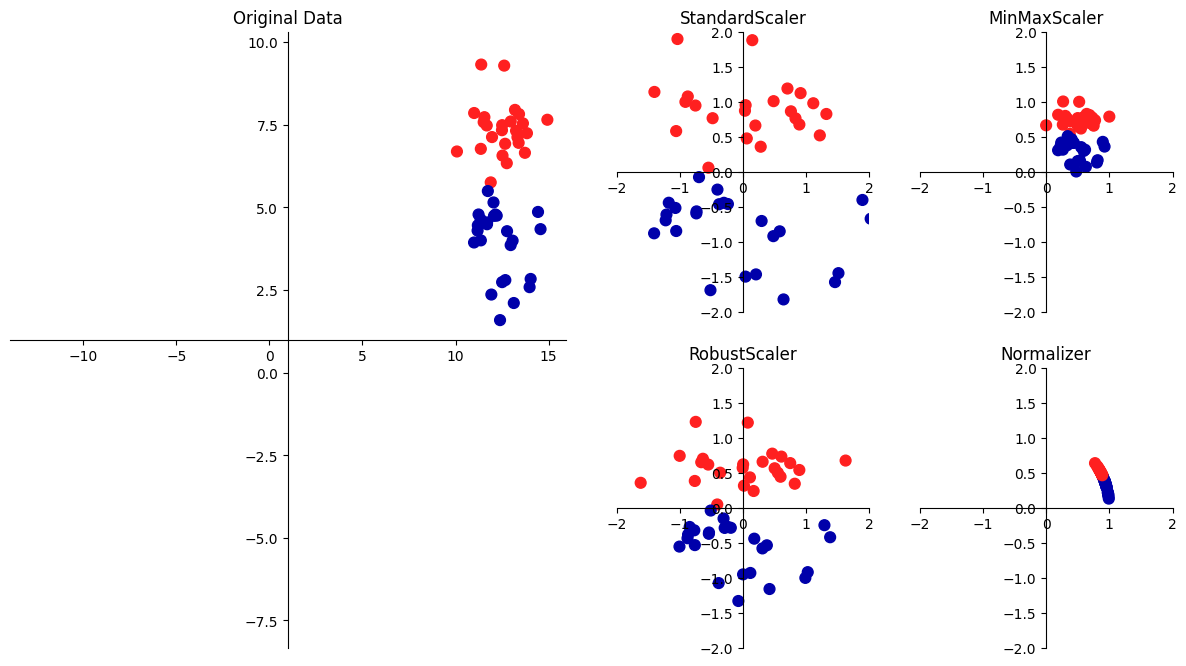

In [3]:
import mglearn

mglearn.plots.plot_scaling()

#### Different Types of Preprocessing

The plot above shows a synthetic dataset of two features. The two features have very different scales: the first feature ranges from 10 to 15 (the x-axis), while the second feature ranges from 1 to 9 (the y-axis).

Next to the Original plot, we show three different ways to rescale the data. The plot in the first row uses the StandardScaler, which ensures that for each feature the mean is 0 and the variance is 1. MinMaxScaler scales each feature to a given range—in this case, between 0 and 1. RobustScaler works similarly to the StandardScaler, but uses the median and quartiles, instead of mean and variance in the second row. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). Lastly, Normalizer scales each data point such that the feature vector has a Euclidean length of 1. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1.

#### Applying Data Transformations

Now that we've seen what the different preprocessing and scaling techniques do to the data, let's apply them to the synthetic data we used earlier. We'll use the same dataset, but we'll apply the MinMaxScaler instead of the StandardScaler.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape
      , X_test.shape)

(426, 30) (143, 30)


As with the supervised learning examples, we split the data into a training and a test set, and fit the transformer on the training set and transform the training set and the test set.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

Let's compare the variable after applying the MinMaxScaler to the original data.

In [7]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same number of samples, with the same values, but the two features are now on the same scale. (Between 0 and 1.)

In [8]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the
test set for the supervised model to work on the test set. 

C:\Users\My computer\AppData\Local\Temp\ipykernel_19432\63084084.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\My computer\AppData\Local\Temp\ipykernel_19432\63084084.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^',
C:\Users\My computer\AppData\Local\Temp\ipykernel_19432\63084084.py:24: UserWarning: *c*

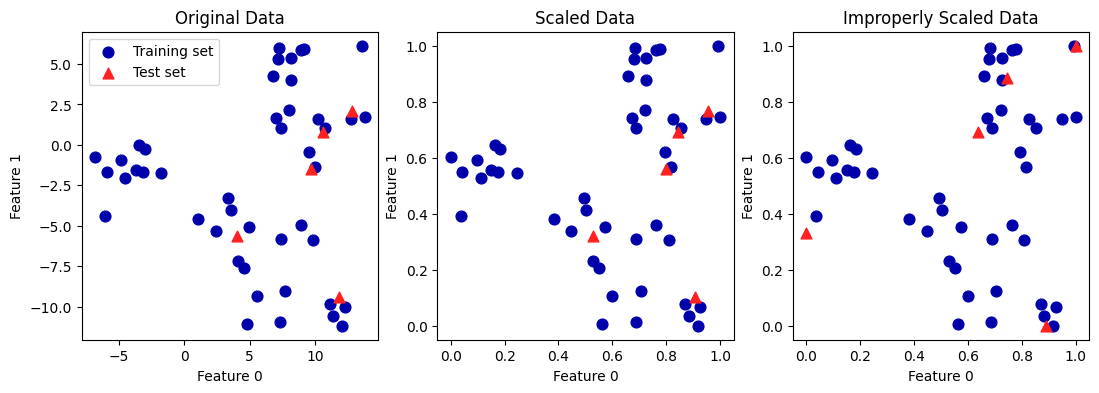

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# make synthetic data
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize = (13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label = "Training set", s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^',
c=mglearn.cm2(1), label = "Test set", s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c = mglearn.cm2(0), label = "Training set", s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^',
c = mglearn.cm2(1), label = "Test set", s = 60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

The first panel is an unscaled two-dimensional dataset, with the training set shown as circles and the test set shown as triangles. The second panel is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then called transform on the training and test sets. You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed. Now all the features are between 0 and 1. You can also see that the minimum and maximum feature values for the test data (the triangles) are not 0 and 1.

The third graph shows what would happen if we scaled the training set and test set separately. In this case, the minimum and maximum feature values for both the training and the test set are 0 and 1. But now the dataset looks different. The test points moved incongruously to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way. 

#### The Effect of Preprocessing on Supervised Learning

Let's go back to Supervised Learning and see how the preprocessing affects the performance of the model. We'll use the synthetic dataset we used earlier, and we'll add a simple supervised model to it. We'll use a k-nearest neighbors classifier, with a grid search over the parameter n_neighbors. We'll use the MinMaxScaler to scale the data before applying the k-nearest neighbors classifier.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Test set predictions:\n{}".format(knn.predict(X_test)))
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Accuracy on test set: 0.92


Apply MinMaxScaler to the data and use the scaled data to train a k-nearest neighbors classifier. We'll use a grid search to adjust the parameter n_neighbors.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# create a grid (or dictionary) of parameters
param_grid = {'n_neighbors': range(1, 11)}

# instantiate the model
knn = KNeighborsClassifier()

# instantiate the grid search
grid = GridSearchCV(knn, param_grid, cv = 5)

# fit the grid with data
grid.fit(X_train, y_train)

# print the best parameters and best score
print("Best parameters: {}".format(grid.best_params_))

best = grid.best_params_

Best parameters: {'n_neighbors': 10}


In [22]:
knn_non_scaled = KNeighborsClassifier(n_neighbors = best['n_neighbors'])
knn_non_scaled.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(knn_non_scaled.score(X_test, y_test)))

Accuracy on test set: 0.94


In [21]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors = best['n_neighbors'])

knn.fit(X_train_scaled, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Test set accuracy: 0.97


Model performance is better when using the scaled data. The test accuracy is also better when using the scaled data.

Now that we’ve seen how simple data transformations for preprocessing work, let’s move on to more interesting transformations using unsupervised learning